In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Details
We pull tweet data from twitter users with a record of financially relevant tweets. This includes news outlets such as BloomBerg, the Economist, Yahoo Finance, etc. This data is pulled with the intention of reducing non-financially relevant noise in order to obtain significant signals.

In [4]:
# Get tweets csv data and drop irrelevant columns
local_path='/Users/Andrew/Desktop/shashank_tweets.parquet'
df = pd.read_parquet(local_path) 

In [5]:
# Shorten the column names
df=df.rename(columns={'public_metrics_following_count': 'following_count', 
                      'public_metrics_followers_count': 'followers_count',
                     'public_metrics_retweet_count': 'retweet_count',
                     'public_metrics_like_count': 'like_count',
                     'public_metrics_quote_count': 'quote_count',
                     'public_metrics_reply_count': 'reply_count',
                     'public_metrics_tweet_count': 'tweet_count',
                     'public_metrics_listed_count': 'listed_count'})
df.head()

,created_at,entities_cashtags,entities_hashtags,entities_urls,like_count,quote_count,reply_count,retweet_count,text,entities_mentions,...,Word_count_LM11_pos,Word_count_LM11_neg,Word_count_Hagenau13_pos,Word_count_Hagenau13_neg,Tweet_Length_characters,Tweet_Length_words,Compound_vader,Positive_vader,Negative_vader,Neutral_vader
0,2021-08-12 14:11:05,1,3,1,0,0,0,0,$CDAY - Ceridian: Beat And Raise Still Doesn't...,0,...,0,0,0,0,119,21,0.0000,0.0,0.000,1.000
1,2021-08-04 23:48:18,1,3,1,0,0,0,0,"$CDAY - Ceridian HCM Holding, Inc. (CDAY) CEO ...",0,...,0,0,0,0,159,31,0.0000,0.0,0.000,1.000
2,2021-06-15 00:45:05,0,0,1,6,1,0,1,Designing a digital-first workplace means putt...,0,...,0,0,0,0,94,12,0.0000,0.0,0.000,1.000
3,2021-05-08 16:55:27,1,3,1,0,0,0,0,"$CDAY - Ceridian HCM Holding, Inc. (CDAY) CEO ...",0,...,0,0,0,0,156,31,0.0000,0.0,0.000,1.000
4,2021-05-07 08:29:21,1,3,1,0,0,0,0,$CDAY - Ceridian: Low Quality At A High Price....,0,...,0,0,0,1,98,19,-0.2732,0.0,0.149,0.851


In [6]:
#Convert string types to float type
df['followers_count']=pd.to_numeric(
    df['followers_count'],errors='coerce')

df['following_count']=pd.to_numeric(
    df['following_count'],errors='coerce')

df['retweet_count']=pd.to_numeric(
    df['retweet_count'],errors='coerce')

df['like_count']=pd.to_numeric(
    df['like_count'],errors='coerce')

df['quote_count']=pd.to_numeric(
    df['quote_count'],errors='coerce')

## Number of Followers and Following Effects on Popularity
In the below subsection, we explore the number of followings and number of followers statistics. Moreover, we visualize and study the underlying effects that each has respectively on the resulting popularity of the tweet. In particular, we study the effects of the number of followers, the number of followings, the ratio between the two, and the interdependent relationship on popularity metrics.

<AxesSubplot:xlabel='following_count', ylabel='Count'>

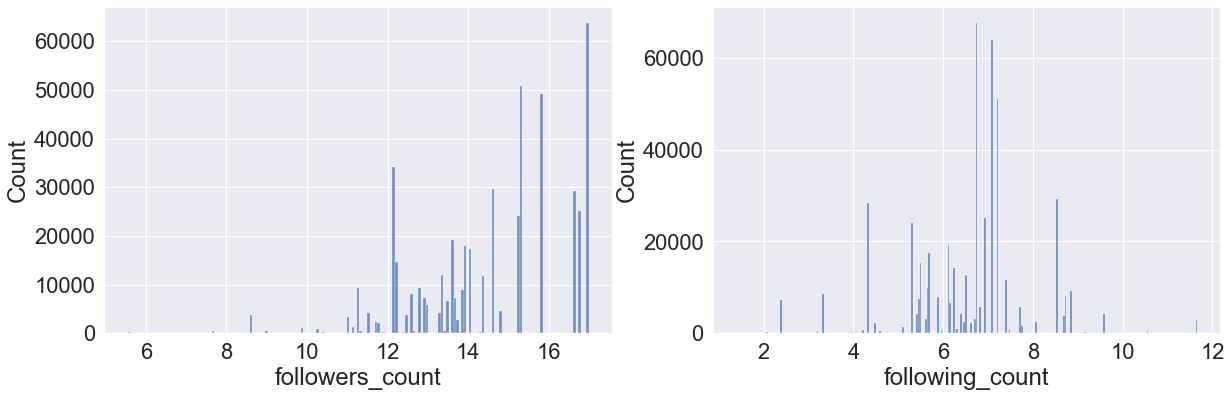

In [12]:
#Histogram plots of followers and following counts on log scale
sns.set(font_scale = 2)
fig, ax = plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df['followers_count'].apply(lambda x: np.log(1+x)), ax=ax[0])

sns.histplot(df['following_count'].apply(lambda x: np.log(1+x)), ax=ax[1])


Upon taking the pointwise log across both the number of followers and the number of followings, we find that the number of followers is heavily skewed to the right, while the number of followings is roughly normally distributed. Therefore, out of the chosen tweet samples, the majority of users seem to have quite a large following and hence, we expect their tweets to be socially and financially significant. 

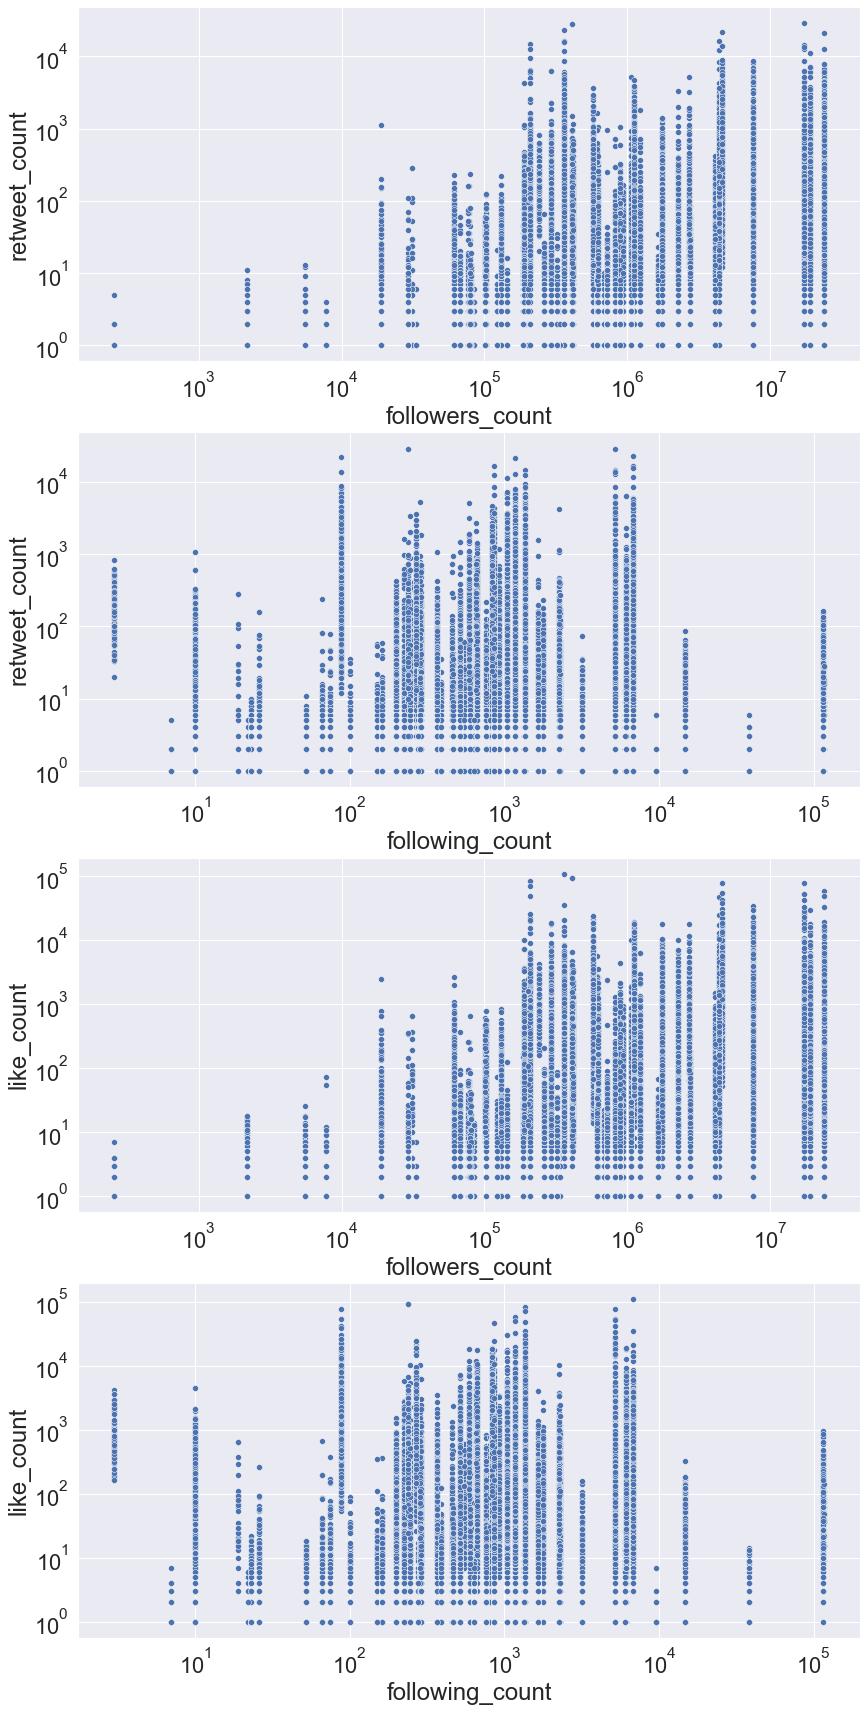

In [48]:
#Plot number of followers vs retweet count and vs likes count
fig, ax = plt.subplots(4, figsize=(14, 30))

sns.scatterplot(data = df, x='followers_count', y = 'retweet_count', ax = ax[0])
ax[0].set_yscale('log')
ax[0].set_xscale('log')

sns.scatterplot(data = df, x='following_count', y='retweet_count', ax = ax[1])
ax[1].set_yscale('log')
ax[1].set_xscale('log')

sns.scatterplot(data = df, x='followers_count', y='like_count', ax = ax[2] )
ax[2].set_yscale('log')
ax[2].set_xscale('log')

sns.scatterplot(data = df, x='following_count', y='like_count', ax = ax[3])
ax[3].set_yscale('log')
ax[3].set_xscale('log')

In order to get a more general sense of the effect of following and followers counts on likes and retweet counts, we plot these variables against each other on a log-log scale. Despite some bands of immaterial dependence, we generally find that an increase in the number of followers is roughly related to the number of likes and the number of retweets. Hence, we expect twitter users with a greater number of followers to be generally more popular. However, it appears that the number of followings does not have a clearly explained effect on the likes or retweet counts.

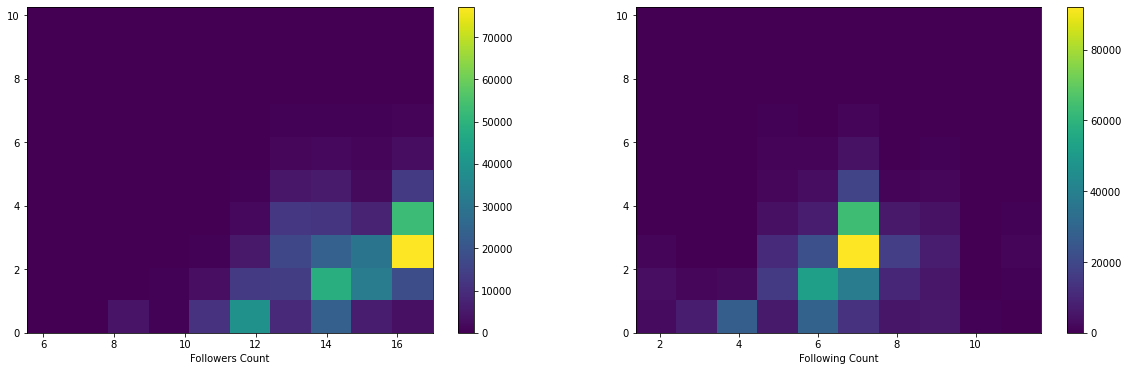

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

h1=ax[0].hist2d(df['followers_count'].apply(lambda x: np.log(1+x)),
             df['retweet_count'].apply(lambda x: np.log(1+x)))
ax[0].set_xlabel("Followers Count")
fig.colorbar(h1[3], ax=ax[0])

h2=ax[1].hist2d(df['following_count'].apply(lambda x: np.log(1+x)),
             df['retweet_count'].apply(lambda x: np.log(1+x)))
ax[1].set_xlabel("Following Count")
fig.colorbar(h2[3], ax=ax[1])


Similar to the above plot, we have made a heat map of the followers counts and following counts against the number of retweets. We find once again that the number of followers seems to monotonically affect the number of retweets, and the relationship of the following count with retweet count remains unclear.  

<AxesSubplot:xlabel='like_count', ylabel='Count'>

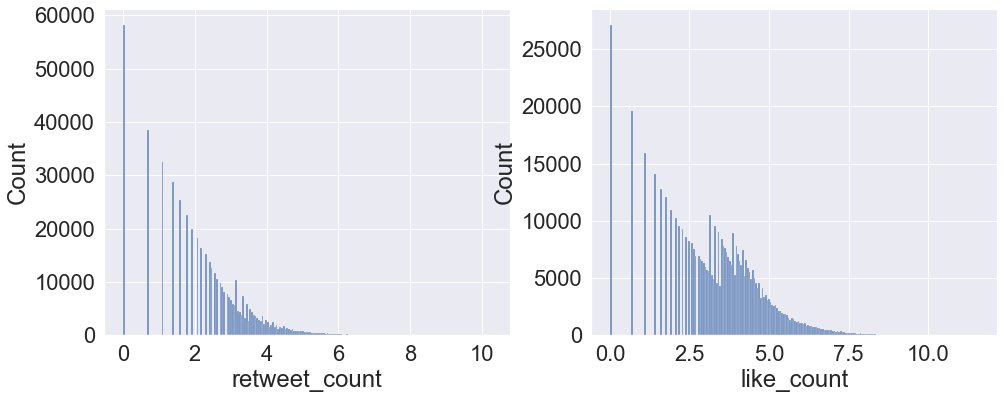

In [23]:
#Histogram plots of retweet and likes distribution
fig, ax = plt.subplots(1,2, figsize=(16, 6))

sns.histplot(df['retweet_count'].apply(lambda x: np.log(1+x)), ax = ax[0])
sns.histplot(df['like_count'].apply(lambda x: np.log(1+x)), ax = ax[1])

We find that the number of retweets and the number of likes roughly follow a gamma distribution skewed to the left. Hence, because there is enough variation in the data, we expect either to serve as a valid metric for predicting popularity. 

## Tweet Length Effects on Popularity
In the below subsection, we study the statistics of tweet length, and we subsequently explore its effect on the resulting popularity of a tweet. 

<AxesSubplot:xlabel='Tweet_Length_characters', ylabel='Count'>

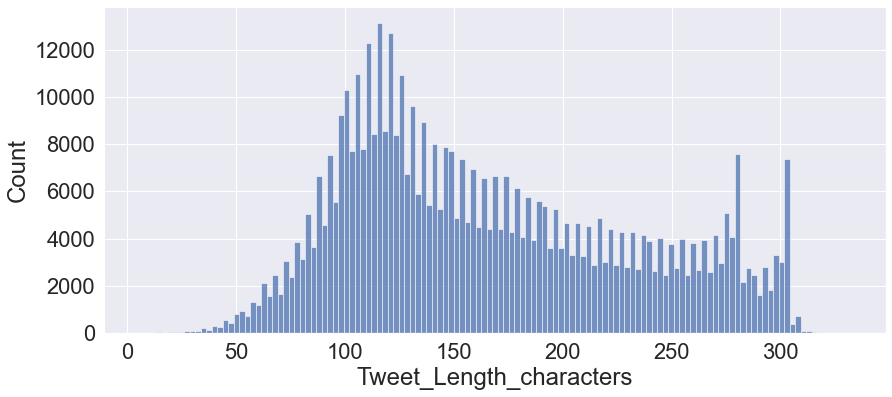

In [24]:
# Histogram plot of text length 
fig, ax = plt.subplots(1, figsize=(14, 6))
sns.histplot(df['Tweet_Length_characters'], ax=ax)


We find that the distribution of text length across tweets is skewed to the right with a large concentration of tweets liking between the band of 100 and 150 characters.

<AxesSubplot:xlabel='Tweet_Length_characters'>

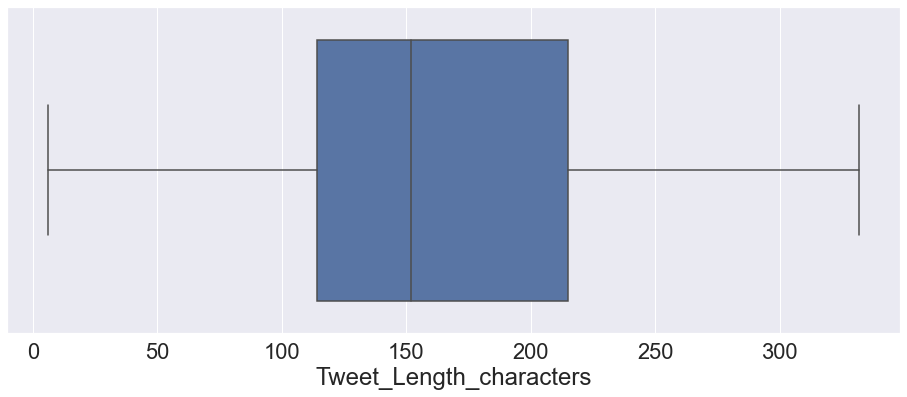

In [30]:
# Box plot of text length statistics
fig, ax = plt.subplots(1, figsize=(16, 6))
sns.boxplot(data= df, x='Tweet_Length_characters', orient ='h')

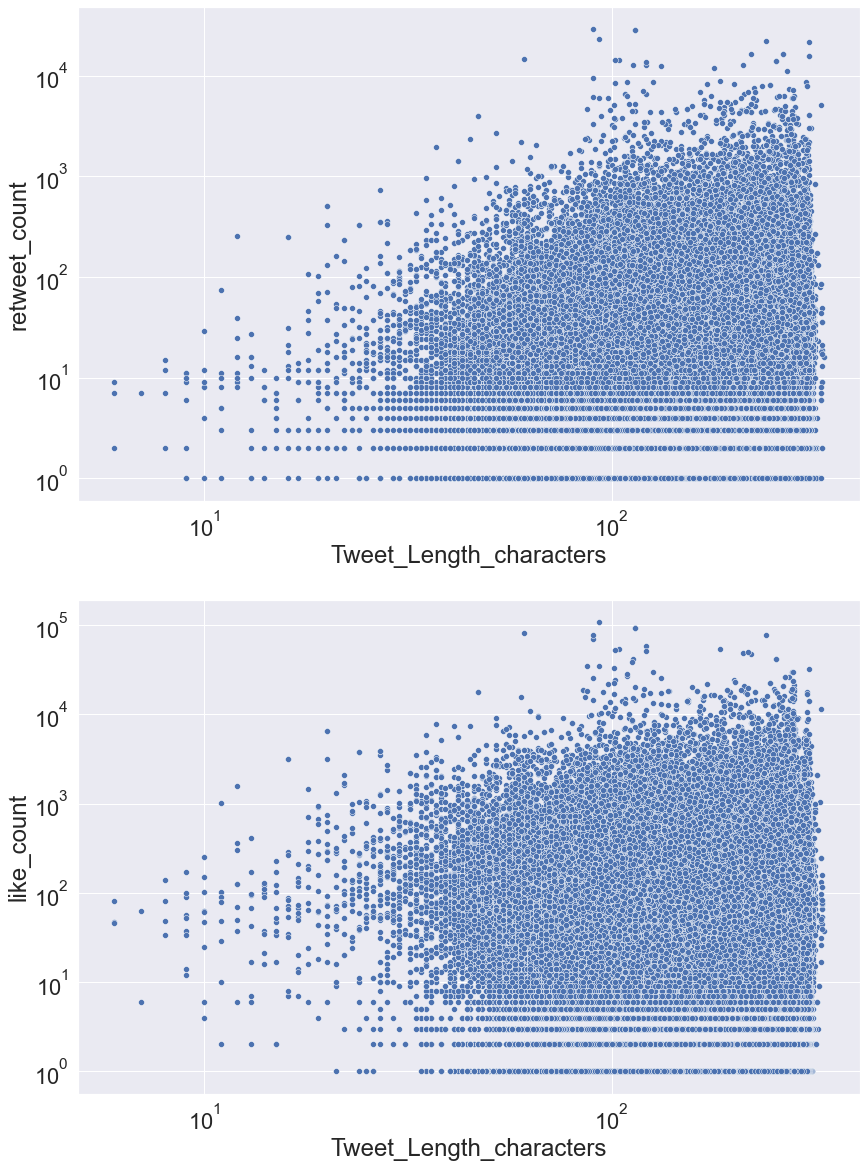

In [54]:
#Plot of text length vs retweet count and vs likes count
fig, ax = plt.subplots(2, figsize=(14, 20))

sns.scatterplot(data=df, x='Tweet_Length_characters',y='retweet_count', ax= ax[0])
ax[0].set_yscale('log')
ax[0].set_xscale('log')     


sns.scatterplot(data=df, x='Tweet_Length_characters',y='like_count', ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_xscale('log')    

In the above plots, we see that roughly increases in the size of a tweet increases the expected popularity. Intuitively, this suggests that tweets with a large amount of content and information lead to a large amount of attention and redistribution.

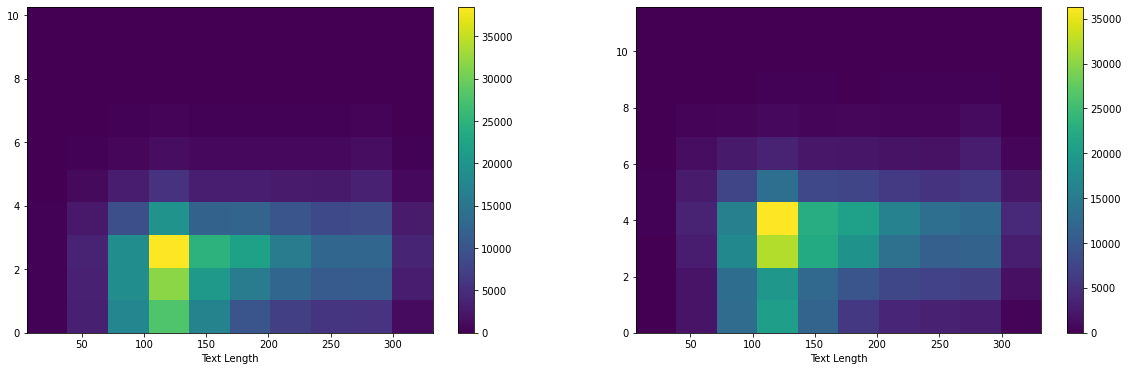

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

h1=ax[0].hist2d(df['Tweet_Length_characters'],
             df['retweet_count'].apply(lambda x: np.log(1+x)))
ax[0].set_xlabel("Text Length")
fig.colorbar(h1[3], ax=ax[0])

h2=ax[1].hist2d(df['Tweet_Length_characters'],
             df['like_count'].apply(lambda x: np.log(1+x)))
ax[1].set_xlabel("Text Length")
fig.colorbar(h2[3], ax=ax[1])

Upon investigating the relationship between tweet length and popularity further, we find that the largest number of retweets and likes actually stems from tweets that are of character length between 100 and 150. However, as the character length increases, there seems to be a strongly correlated band with a high number of retweets and likes.

## Tweet Sentiment Effects on Popularity
In this subsection, we analyze the statistics of the positive, negative and neutral sentiments associated with the text data as given by the Vader sentiment analysis library. Vader is particularly suited for tweet data as the library comes with built in social media/colloquial features such as slang, emojis, hashtags, etc. We also analyze the effect that these Vader sentiments have on the overall popularity paired with some of the other aforementioned features. 

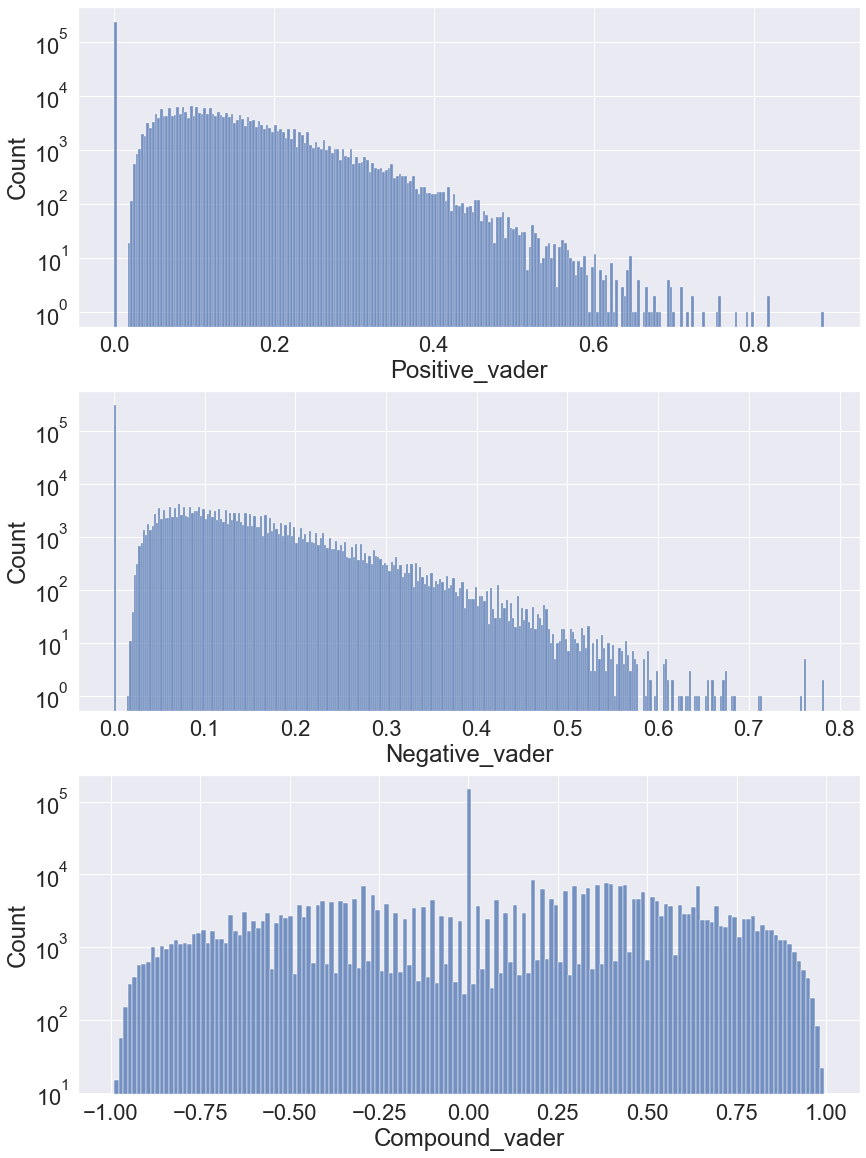

In [37]:
# Plot positive, negative and scoring sentiments in  histogram against retweet count
fig, ax = plt.subplots(3,1, figsize=(14, 20))

sns.histplot(df['Positive_vader'], ax=ax[0])
ax[0].set_yscale('log')
sns.histplot(df['Negative_vader'], ax=ax[1])
ax[1].set_yscale('log')
sns.histplot(df['Compound_vader'], ax=ax[2])
ax[2].set_yscale('log')

In the above plots, we see that both negative and positive vader scores follow roughly a gamma distribution, while the Compound vader score is roughly a beta distribution with the exception of a peak around -.05. 

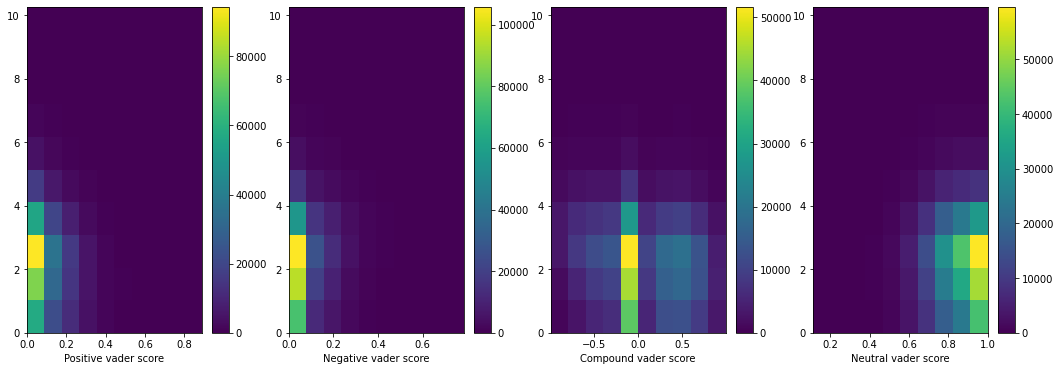

In [24]:
# Plot positive and negative scoring sentiments in 2d histogram against retweet count
fig, ax = plt.subplots(1,4, figsize=(18, 6))
h1 = ax[0].hist2d(df['Positive_vader'],
             df['retweet_count'].apply(lambda x: np.log(1+x)))
ax[0].set_xlabel("Positive vader score")
fig.colorbar(h1[3], ax=ax[0])

h2 = ax[1].hist2d(df['Negative_vader'],
             df['retweet_count'].apply(lambda x: np.log(1+x)))
ax[1].set_xlabel("Negative vader score")
fig.colorbar(h2[3], ax=ax[1])

h3 = ax[2].hist2d(df['Compound_vader'], 
             df['retweet_count'].apply(lambda x: np.log(1+x)))
ax[2].set_xlabel("Compound vader score")
fig.colorbar(h3[3], ax=ax[2])

h4 = ax[3].hist2d(df['Neutral_vader'], 
             df['retweet_count'].apply(lambda x: np.log(1+x)))
ax[3].set_xlabel("Neutral vader score")
fig.colorbar(h4[3], ax=ax[3])

In the above plots, we see that somewhat surprisingly the tweets that have a slightly negative score seem to have the most retweet counts. However, in comparing positive compound scores and negative compound scores, it seems that the positive compound scores have a greater number of retweets.

<AxesSubplot:>

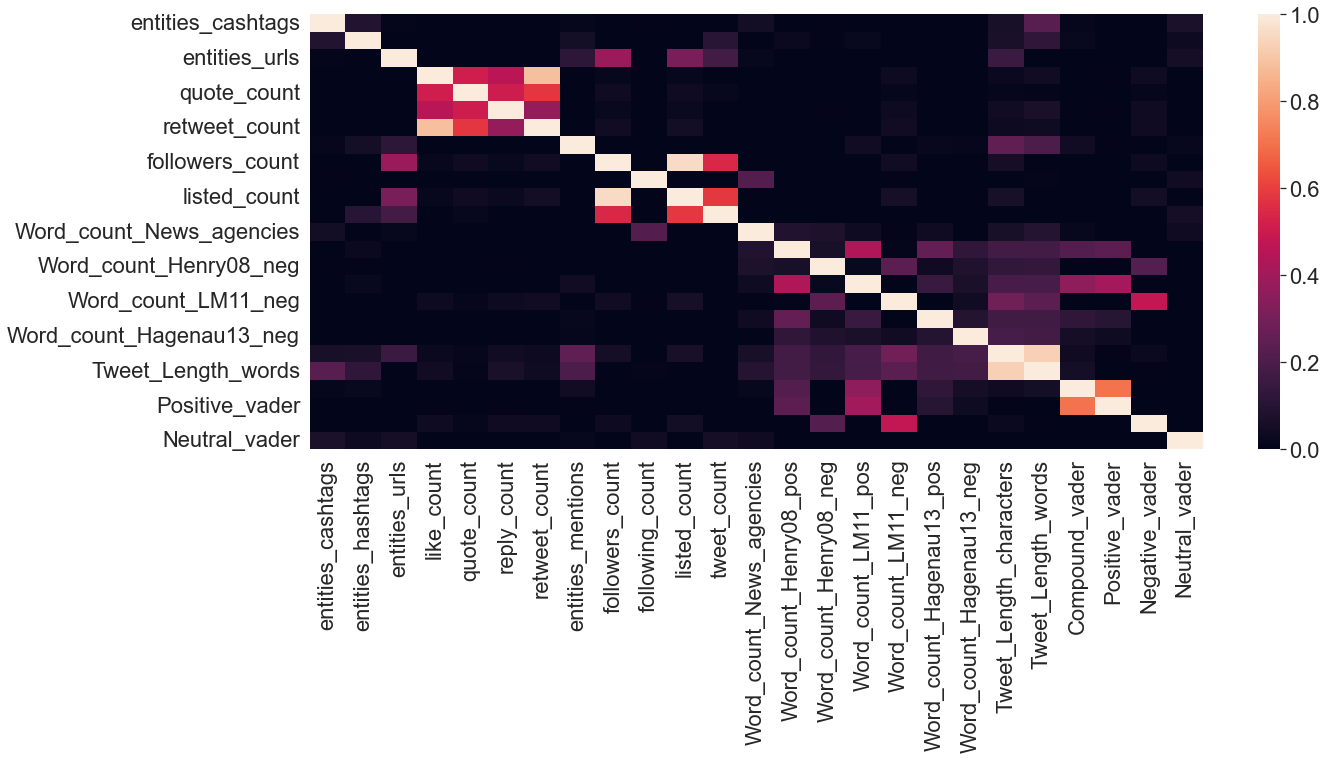

In [40]:
fig, ax = plt.subplots(1,figsize=(20, 8))
df_corr=df[['entities_cashtags', 'entities_hashtags', 'entities_urls',
       'like_count', 'quote_count', 'reply_count', 'retweet_count',
       'entities_mentions', 'followers_count','following_count', 'listed_count', 
        'tweet_count','Company_name', 'Word_count_News_agencies', 'Word_count_Henry08_pos',
       'Word_count_Henry08_neg', 'Word_count_LM11_pos', 'Word_count_LM11_neg',
       'Word_count_Hagenau13_pos', 'Word_count_Hagenau13_neg',
       'Tweet_Length_characters', 'Tweet_Length_words', 'Compound_vader',
       'Positive_vader', 'Negative_vader', 'Neutral_vader']].corr()
sns.heatmap(df_corr, vmin=0, vmax=1)


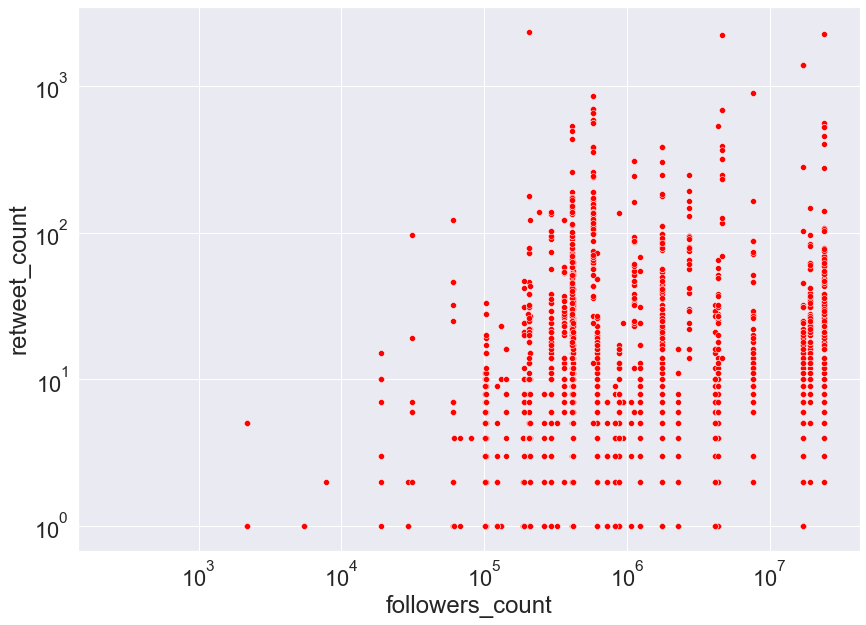

In [64]:
#Plot number of followers vs retweet count and vs likes count
fig, ax = plt.subplots(1, figsize=(14, 10))

sns.scatterplot(data = df.loc[df['Compound_vader']>0.9], x='followers_count', y = 'retweet_count', ax = ax, color='red')
#sns.scatterplot(data = df.loc[df['Compound_vader']<-0.2], x='followers_count', y = 'retweet_count', ax = ax, color='blue')

ax.set_yscale('log')
ax.set_xscale('log')
